# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [101]:
import cudf
import cuml
import numpy as np
import cupy as cp

---

# Creating datasets

---

#### datasets.make_blobs()

<AxesSubplot:xlabel='feat_0', ylabel='feat_1'>

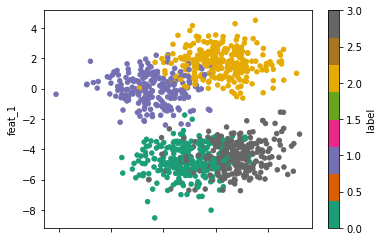

In [52]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=2, random_state=np.random.randint(1e9))

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(2)])
df['label'] = cudf.Series(y)
df.head()

df.to_pandas().plot(kind='scatter', x='feat_0', y='feat_1', c='label', colormap='Dark2')

<AxesSubplot:xlabel='feat_0', ylabel='feat_1'>

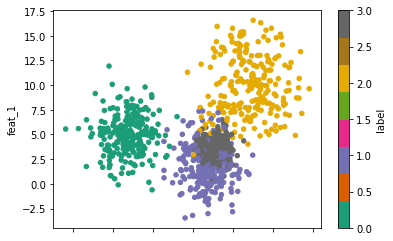

In [55]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=[2, 2, 3, 1], random_state=np.random.randint(1e9))

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(2)])
df['label'] = cudf.Series(y)
df.head()

df.to_pandas().plot(kind='scatter', x='feat_0', y='feat_1', c='label', colormap='Dark2')

#### datasets.make_clasification()

In [78]:
X, y = cuml.make_classification(
    n_samples=1000
    , n_classes=2
    , n_features=4
    , n_informative=2
    , random_state=np.random.randint(1e9)
)

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['label'] = cudf.Series(y)
df.head()

,feat_0,feat_1,feat_2,feat_3,label
0,1.028524,-1.615733,0.000894,-0.086764,0
1,2.338140,0.596175,-1.392643,-0.525873,0
2,-0.512074,-1.506316,-0.456578,-0.318301,0
3,1.492608,0.424638,-0.457939,-0.328819,1
4,2.208708,-0.438976,-1.122359,-0.809985,1


In [127]:
X, y = cuml.make_classification(
    n_samples=1000
    , n_classes=2
    , n_features=4
    , n_informative=2
    , flip_y=0.05
    , shift=cp.array([2.3, -0.7, -0.4, 0.3])
    , scale=cp.array([1.2, -1.1,  0.3, 3.2])
    , random_state=np.random.randint(1e9)
)

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['label'] = cudf.Series(y)
df.head(10).to_pandas().to_records()

rec.array([(0, 1.4407506, -0.17609194, -0.05662146,  1.4986384 , 1),
           (1, 1.9392083,  0.938771  ,  0.59661865,  7.630234  , 1),
           (2, 5.804298 , -1.0278056 , -0.6512431 , -4.28335   , 1),
           (3, 1.9438465, -0.5557215 , -0.25204346, -0.27896553, 1),
           (4, 3.9352636,  2.5950162 ,  0.07809081,  2.3434508 , 0),
           (5, 1.630494 , -0.3503328 , -0.13861395,  0.77121687, 1),
           (6, 4.262287 , -0.09084405, -0.11273719,  0.7492691 , 1),
           (7, 2.2952747,  2.2511785 , -0.15584555,  0.07946698, 0),
           (8, 5.8559527, -1.6457684 , -0.8258039 , -5.528215  , 1),
           (9, 1.4934161, -0.557788  , -0.16832599,  0.68511635, 1)],
          dtype=[('index', '<i8'), ('feat_0', '<f4'), ('feat_1', '<f4'), ('feat_2', '<f4'), ('feat_3', '<f4'), ('label', '<i8')])

#### datasets.make_regression()

In [124]:
X, y = cuml.make_regression(
    n_samples=1000
    , n_targets=2
    , n_features=4
    , n_informative=2
    , random_state=np.random.randint(1e9)
)

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['target'] = cudf.Series(y)
df.head()

,feat_0,feat_1,feat_2,feat_3,target
0,-0.311401,-0.334854,-1.258160,-0.519542,-68.693039
1,0.939454,0.044159,1.213827,-0.081865,-20.088144
2,-0.021753,-2.423762,-0.183596,-1.184115,56.128796
3,0.789052,1.322937,1.718589,0.805748,45.997391
4,0.850821,0.014161,-0.612244,0.280961,-109.964928


In [125]:
X, y, c = cuml.make_regression(
    n_samples=1000
    , n_targets=2
    , n_features=4
    , n_informative=2
    , bias=-3.4
    , noise=0.2
    , coef=True
    , random_state=np.random.randint(1e9)
)

print(f'coefficients:\n {cp.array(c)}')

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['target'] = cudf.Series(y)
df.head()

coefficients:
 [[60.79306  68.76502 ]
 [ 0.        0.      ]
 [ 0.        0.      ]
 [32.86932  99.432625]]


,feat_0,feat_1,feat_2,feat_3,target
0,1.208979,0.139970,1.975338,2.264939,144.460114
1,-1.912348,1.839080,0.643695,0.422302,304.880280
2,0.225252,0.568083,1.098544,0.766095,-105.897789
3,0.963638,0.995509,0.516448,-0.420155,-92.724434
4,0.137367,-0.014376,0.018379,-1.133550,35.634888


#### datasets.make_arima()

In [121]:
X = cuml.make_arima(
    batch_size=1000
    , n_obs=100
    , order=(2,1,2)
    , seasonal_order=(0,1,2,12)
    , random_state=np.random.randint(1e9)
)
X[0][0:10]

array([ 0.40502062, -0.82316131,  0.87810477, -0.6792451 ,  0.58225821,
       -0.69637167,  0.53545499, -0.6178028 , -0.7361254 , -0.43787955])

In [123]:
X = cuml.make_arima(
    batch_size=1000
    , n_obs=100
    , order=(2,1,2)
    , seasonal_order=(0,1,2,12)
    , output_type='cudf'
    , random_state=np.random.randint(1e9)
)
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.940826,0.650457,0.117170,0.012602,-0.435445,-0.419210,-0.406821,-0.197010,-0.955119,-0.259748,...,-0.728726,0.447123,0.615382,0.663699,-0.543872,-0.849390,-0.428488,-0.957145,-0.131877,0.311933
1,1.032635,0.527078,-0.335987,-0.320716,-0.642153,-0.367666,-0.261861,-0.345087,-0.936035,-0.348947,...,-0.917113,0.180069,0.363527,0.444256,-0.385165,-1.047173,-0.191025,-1.020187,0.028629,0.027351
2,1.281297,0.833905,-0.485931,-0.693244,-0.565637,-0.243203,-0.323825,-0.124013,-0.641795,0.099848,...,-0.609433,-0.166499,0.516388,0.862692,-0.412550,-1.023458,-0.523204,-1.387024,0.455761,-0.158642
3,1.315086,0.948136,-0.404785,-0.722237,-0.103139,-0.707311,0.115697,-0.098976,-0.302604,-0.075359,...,-0.180467,0.230176,0.025840,0.607279,0.069315,-0.815924,-0.854842,-1.551248,-0.016747,-0.343880
4,1.049214,0.469267,-0.163652,-0.722007,0.343145,-0.479637,0.486899,-0.223715,-0.647537,0.104941,...,-0.627124,0.487752,-0.115188,0.584272,0.314058,-1.274123,-0.860940,-1.907407,-0.402350,0.025715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11.428271,-4.356741,10.281471,-4.145026,19.084081,-3.849875,-2.621606,-12.455023,-0.885814,-12.764051,...,5.986963,25.139513,1.637831,-1.360673,16.101146,-12.768523,28.220151,2.342067,-3.818080,-41.737553
96,11.520018,-4.553534,11.117914,-3.548486,20.370429,-4.253341,-3.014869,-11.529998,-2.092430,-12.430644,...,6.402844,25.204753,2.159486,-0.951826,14.974404,-13.474137,28.877876,3.203545,-3.787976,-41.304883
97,12.103181,-4.448578,9.421174,-3.209167,21.039656,-4.063674,-3.090943,-10.728368,-1.272611,-11.621986,...,5.927002,24.835099,2.061267,-1.076542,16.392859,-13.293272,29.283172,3.269883,-6.635474,-42.934285
98,12.967389,-4.458395,7.275156,-3.611186,21.940345,-3.546658,-2.700043,-10.569476,-2.683582,-11.341270,...,6.381512,24.703569,2.299340,-0.782614,16.630366,-13.293216,29.147412,3.158846,-6.118478,-43.091291
